# Modelo Preditivo de Ingressantes da Empresa Y no Ensino Superior: Avaliação de Potencial de Expansão

Este modelo é desenvolvido para quantificar o potencial de novos alunos ingressantes em cursos de ensino a distância (EAD) da Empresa Y em cidades sem a presença atual da empresa. Utilizando um conjunto de dados robusto com variáveis demográficas, educacionais, socioeconômicas e de infraestrutura, o modelo visa prever o ingresso de alunos onde a empresa Y considera expandir seus polos educacionais.

## Contexto e Justificativa
- **Expansão Baseada em Dados:** A decisão de estabelecer novos polos de ensino é complexa e multifacetada. Este modelo busca simplificar essa decisão, fornecendo previsões quantitativas que apoiam a expansão estratégica.
- **Treinamento e Validação:** O modelo será inicialmente treinado e validado nas cidades onde a Kroton já opera, assegurando que as previsões sejam fundamentadas em dados históricos confiáveis.
- **Aplicação Estratégica:** Após a validação, o modelo será usado para estimar o número de ingressantes em potencial nas cidades-alvo, informando a viabilidade e o planejamento da expansão.

## Variáveis Analíticas
- A análise incluirá variáveis como dados do censo ensino superior (`INGRESSANTES`, `MATRICULAS`,`INCRIÇÕES`,`VAGAS`), infraestrutura tecnológica (`DOMICILIOS_BL`,`TEL_4_5G`, `QT_ISPS`), indicadores socioeconômicos (`PIB_PER_CAPTA`, `RENDA_MED`), dados demográficos (`POP`, `DOMICILIOS`, `DENS_POP`), entre outras (um total de 49 Features).
- `ING_EAD_Y`: A variável alvo que representa o número de novos alunos no EAD da empresa Y.

Este modelo é uma ferramenta chave para dirigir os esforços de expansão da Y, garantindo que os recursos sejam alocados onde têm maior probabilidade de sucesso, conforme indicado pelos dados analisados.


### Pacotes Utilizados

In [1]:
import numpy as np # Algebra Linear
import pandas as pd # Processamento de dados (Data wrangling)
import matplotlib.pyplot as plt #Visualização de dados
import seaborn as sns #Gráficos estatisticos

### Dataset Ultilizado
*1.* importando os dados

*2.* Verificando a dimensão e tipo de dados

In [2]:
# Lê o arquivo CSV
data = pd.read_csv("C:\\Users\\erico.bonilha\\OneDrive - EDITORA E DISTRIBUIDORA EDUCACIONAL S A\\Área de Trabalho\\IC_LOCAL\\MODELOS ESTATISTICOS\\PROJETO EXPANSÃO DE POLOS\\DF_MODEL.csv", sep=";")
df = data
display(df.head())
# descrição dos dados
df.info()

,COD_IBGE,ING_EAD_Y,TAXA_ING_EAD_TGT,ING,ING_EAD,ING_PRE,MAT,MAT_EAD,MAT_PRE,INSC,...,SEG_MUN,SEG_MUN_CLASS,POP,DOMICILIOS,DENS_POP,POP_TGT,DENS_POP_TGT,POTENCIAL_CONS,IDH_EDU,IDH_EDU_CLASS
0,355030,32681,"0,142145269",412187,222593,189594,723803,284329,439474,1840442,...,Metrópoles,8,12200180,4442084,8009,1565954,1028,1094940046,"0,725",4
1,330455,11232,"0,158458584",160005,111087,48918,319271,165801,153470,888574,...,Metrópoles,8,6625849,2584457,5520,701048,584,508213357,"0,719",4
2,530010,13377,"0,181239165",105071,69560,35511,183422,91739,91683,277637,...,Metrópoles,8,2923369,1045027,505,383802,66,224829161,"0,742",4
3,310620,16279,"0,162581457",86769,51826,34943,171000,72852,98148,278832,...,Metrópoles,8,2392678,939891,7220,318769,962,206148436,"0,737",4
4,410690,3300,"0,185498832",74738,49522,25216,140960,72261,68699,397532,...,Metrópoles,8,1871789,684786,4300,266967,613,312596797,"0,768",4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   COD_IBGE          5570 non-null   int64 
 1   ING_EAD_Y         5570 non-null   int64 
 2   TAXA_ING_EAD_TGT  5570 non-null   object
 3   ING               5570 non-null   int64 
 4   ING_EAD           5570 non-null   int64 
 5   ING_PRE           5570 non-null   int64 
 6   MAT               5570 non-null   int64 
 7   MAT_EAD           5570 non-null   int64 
 8   MAT_PRE           5570 non-null   int64 
 9   INSC              5570 non-null   int64 
 10  INSC_EAD          5570 non-null   int64 
 11  INSC_PRE          5570 non-null   int64 
 12  VAGA              5570 non-null   int64 
 13  VAGA_EAD          5570 non-null   int64 
 14  VAGA_PRE          5570 non-null   int64 
 15  VAG_INSC          5570 non-null   object
 16  VAGA_INSC_EAD     5570 non-null   object
 17  VAGA_INSC_PRE 

### Limpeza e ajustes dos dados

In [3]:
# Ajustes tipo de dados
colunas_para_converter = ['TAXA_ING_EAD_TGT', 'VAG_INSC',
                          'VAGA_INSC_EAD', 'VAGA_INSC_PRE', 'SHARE_CONC_EAD', 
                          'COB_BL_DOM', 'CAGR_POP', 'IDH_EDU']

for coluna in colunas_para_converter:
    df[coluna] = df[coluna].str.replace(',', '.').astype(float)
#Dropar código da cidade e a váriavel seg_mun que está categorica
df = df.drop(['COD_IBGE','SEG_MUN', 'POLOS_Y','IDH_EDU','ING','MAT'], axis=1)
df.head()    
print(df.dtypes)  

ING_EAD_Y             int64
TAXA_ING_EAD_TGT    float64
ING_EAD               int64
ING_PRE               int64
MAT_EAD               int64
MAT_PRE               int64
INSC                  int64
INSC_EAD              int64
INSC_PRE              int64
VAGA                  int64
VAGA_EAD              int64
VAGA_PRE              int64
VAG_INSC            float64
VAGA_INSC_EAD       float64
VAGA_INSC_PRE       float64
CURSOS                int64
CURSOS_EAD            int64
CURSOS_PRE            int64
CONCL_EM              int64
TT_ESCOLA             int64
TT_FAC                int64
IES                   int64
TAXA_ING_IES_EAD      int64
SHARE_CONC_EAD      float64
COB_Y_CENSO           int64
COB_Y_ATUAL           int64
TEL_4_5G              int64
QT_ISPS               int64
COB_BL_DOM          float64
DOMICILIO_BL          int64
CAGR_POP            float64
PIB_PER_CAPTA         int64
RENDA_MED             int64
PEA_DIA               int64
POP_TRAB              int64
SEG_MUN_CLASS       

### Verificando se há valores nulos

In [111]:
df.isnull().sum()

ING_EAD_Y           0
TAXA_ING_EAD_TGT    0
ING_EAD             0
ING_PRE             0
MAT_EAD             0
MAT_PRE             0
INSC                0
INSC_EAD            0
INSC_PRE            0
VAGA                0
VAGA_EAD            0
VAGA_PRE            0
VAG_INSC            0
VAGA_INSC_EAD       0
VAGA_INSC_PRE       0
CURSOS              0
CURSOS_EAD          0
CURSOS_PRE          0
CONCL_EM            0
TT_ESCOLA           0
TT_FAC              0
IES                 0
TAXA_ING_IES_EAD    0
SHARE_CONC_EAD      0
COB_Y_CENSO         0
COB_Y_ATUAL         0
TEL_4_5G            0
QT_ISPS             0
COB_BL_DOM          0
DOMICILIO_BL        0
CAGR_POP            0
PIB_PER_CAPTA       0
RENDA_MED           0
PEA_DIA             0
POP_TRAB            0
SEG_MUN_CLASS       0
POP                 0
DOMICILIOS          0
DENS_POP            0
POP_TGT             0
DENS_POP_TGT        0
POTENCIAL_CONS      0
IDH_EDU_CLASS       0
dtype: int64

### Incluindo no modelo apenas onde a Empresa Y está presente (Para ser treinado)

In [4]:
#Excluindo cidades onde a Empresa Y não tem atuação em 2022
df_atendidas = df[df['COB_Y_CENSO'] == 1]
df_atendidas.shape

(1576, 43)

### Verificando proporção de valores zerados por coluna

In [5]:
# Contar quantos zeros há em cada coluna do DataFrame
zeros_count = (df_atendidas == 0).sum()
# Calcular a proporção de zeros em relação ao total de linhas
zeros_proportion = zeros_count / len(df)
# Exibir as proporções
print(zeros_proportion)

ING_EAD_Y           0.000000
TAXA_ING_EAD_TGT    0.000000
ING_EAD             0.000000
ING_PRE             0.171275
MAT_EAD             0.000180
MAT_PRE             0.166786
INSC                0.168761
INSC_EAD            0.244165
INSC_PRE            0.169300
VAGA                0.167864
VAGA_EAD            0.243806
VAGA_PRE            0.168223
VAG_INSC            0.168761
VAGA_INSC_EAD       0.244165
VAGA_INSC_PRE       0.169300
CURSOS              0.166248
CURSOS_EAD          0.243447
CURSOS_PRE          0.166607
CONCL_EM            0.000000
TT_ESCOLA           0.000180
TT_FAC              0.015440
IES                 0.000000
TAXA_ING_IES_EAD    0.000000
SHARE_CONC_EAD      0.036984
COB_Y_CENSO         0.000000
COB_Y_ATUAL         0.025494
TEL_4_5G            0.000000
QT_ISPS             0.000180
COB_BL_DOM          0.000180
DOMICILIO_BL        0.000180
CAGR_POP            0.000180
PIB_PER_CAPTA       0.000000
RENDA_MED           0.000000
PEA_DIA             0.000000
POP_TRAB      

# Visualisações descritivas
### Retirando os Ouliers

In [19]:
#Calculo intervalo interquartil (IQR)
Q1 = df_atendidas['ING_EAD_Y'].quantile(0.25)
Q3 = df_atendidas['ING_EAD_Y'].quantile(0.75)
IQR = Q3 - Q1
# Definindo limites para os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrando o DataFrame para remover os outliers
df_descritivas = df_atendidas[(df_atendidas['ING_EAD_Y'] >= limite_inferior) & 
                                   (df_atendidas['ING_EAD_Y'] <= limite_superior)]
# Verificando a nova forma do DataFrame
print(df_descritivas.shape)


(1385, 43)


### Como o perfil do segmento da cidade se relaciona com os Ingressantes na empresa Y e o Índice IDH de Educação
 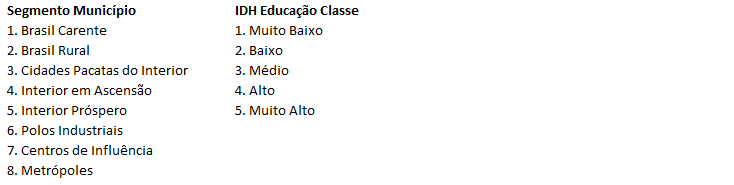


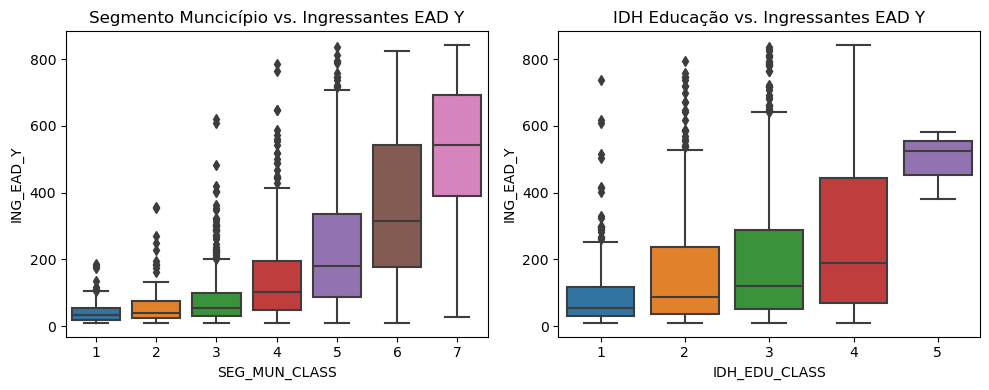

In [20]:
# Nº de figuras
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Seguimento municipio
sns.boxplot(x='SEG_MUN_CLASS', y='ING_EAD_Y', data=df_descritivas, ax=axes[0])
axes[0].set_title('Segmento Muncicípio vs. Ingressantes EAD Y')
# IDH
sns.boxplot(x='IDH_EDU_CLASS', y='ING_EAD_Y', data=df_descritivas, ax=axes[1])
axes[1].set_title('IDH Educação vs. Ingressantes EAD Y')
# Ajuste layout
plt.tight_layout()
# Plotar
plt.show()
df_modelo = df_atendidas.drop(['IDH_EDU_CLASS'], axis=1)

#### Verificando Relação das Features com Ingressantes Y e sua linha de regressão (Tendência Central)

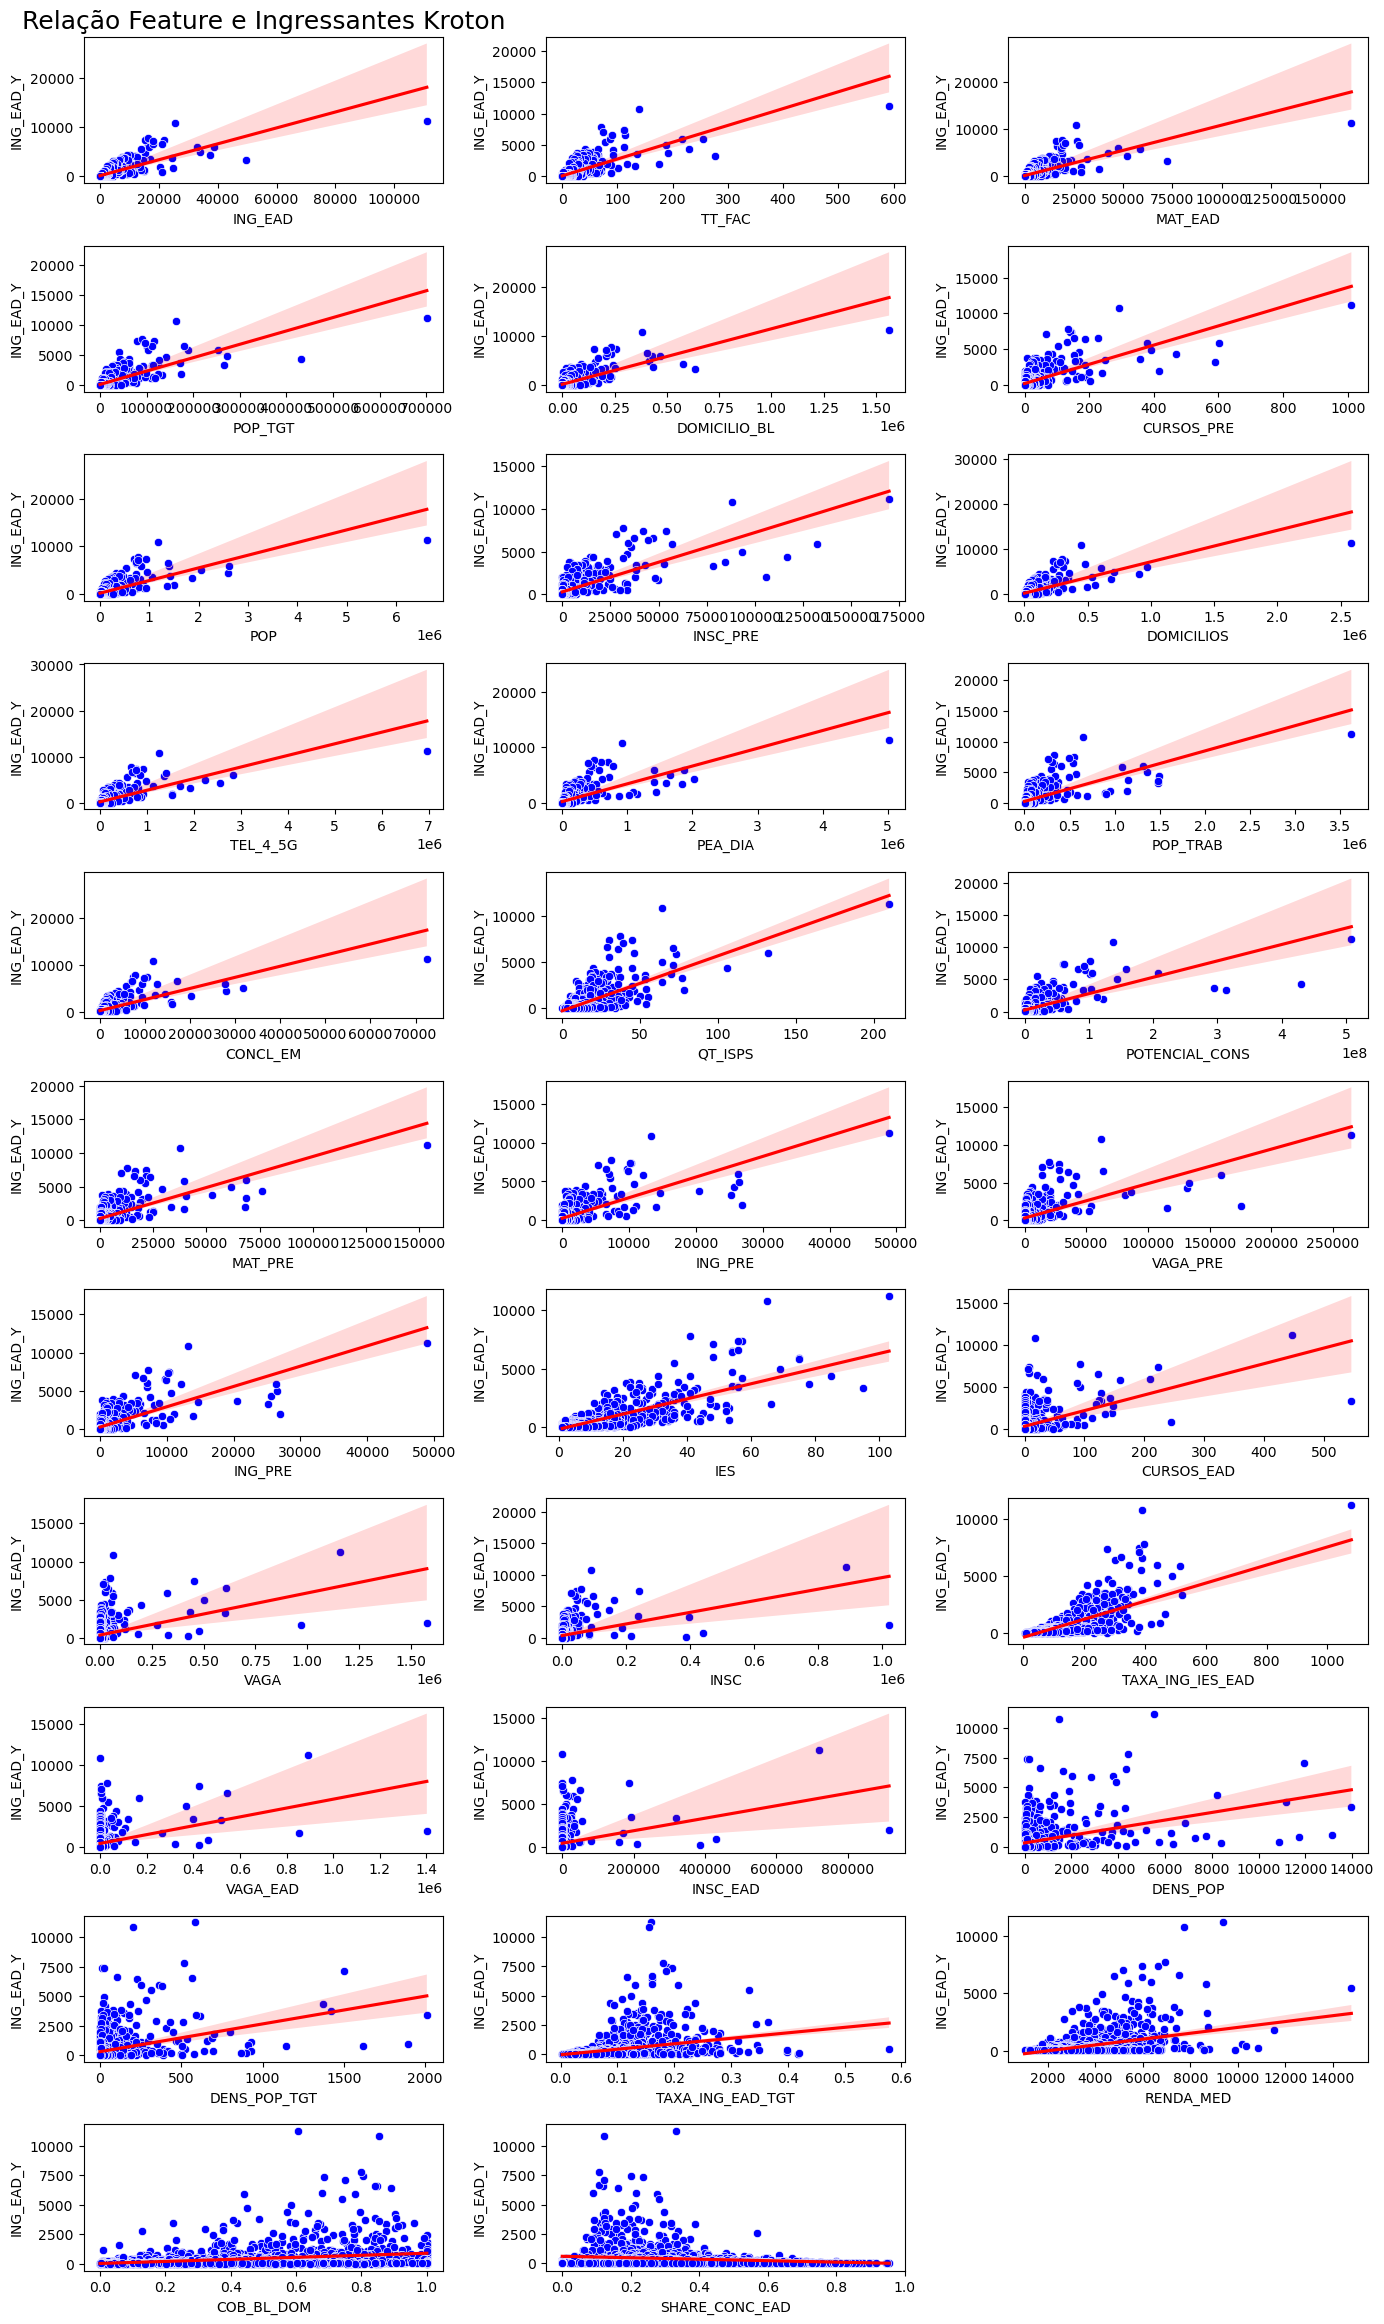

In [22]:
# Verificando Relação das Features com Ingressantes Y e sua linha de regressão (Tendência Central)
pares_variaveis = [
    ("ING_EAD", "ING_EAD_Y"),
    ("TT_FAC", "ING_EAD_Y"),
    ("MAT_EAD", "ING_EAD_Y"),
    ("POP_TGT", "ING_EAD_Y"),
    ("DOMICILIO_BL", "ING_EAD_Y"),
    ("CURSOS_PRE", "ING_EAD_Y"),
    ("POP", "ING_EAD_Y"),
    ("INSC_PRE", "ING_EAD_Y"),
    ("DOMICILIOS", "ING_EAD_Y"),
    ("TEL_4_5G", "ING_EAD_Y"),
    ("PEA_DIA", "ING_EAD_Y"),
    ("POP_TRAB", "ING_EAD_Y"),
    ("CONCL_EM", "ING_EAD_Y"),
    ("QT_ISPS", "ING_EAD_Y"), 
    ("POTENCIAL_CONS", "ING_EAD_Y"), 
    ("MAT_PRE", "ING_EAD_Y"), 
    ("ING_PRE", "ING_EAD_Y"), 
    ("VAGA_PRE", "ING_EAD_Y"),
    ("ING_PRE", "ING_EAD_Y"),
    ("IES", "ING_EAD_Y"),
    ("CURSOS_EAD", "ING_EAD_Y"),
    ("VAGA", "ING_EAD_Y"),
    ("INSC", "ING_EAD_Y"),
    ("TAXA_ING_IES_EAD", "ING_EAD_Y"),
    ("VAGA_EAD", "ING_EAD_Y"),
    ("INSC_EAD", "ING_EAD_Y"),
    ("DENS_POP", "ING_EAD_Y"),
    ("DENS_POP_TGT", "ING_EAD_Y"),
    ("TAXA_ING_EAD_TGT", "ING_EAD_Y"),
    ("RENDA_MED", "ING_EAD_Y"),
    ("COB_BL_DOM", "ING_EAD_Y"),
    ("SHARE_CONC_EAD", "ING_EAD_Y")    
]


plt.figure(figsize=(14, 25))  # Tamanho imagens

# criando subplots para os principais pares
for i, (x_var, y_var) in enumerate(pares_variaveis[:33], 1):
    plt.subplot(12, 3, i)  # 12 linhas, 3 colunas, posição i para 7 pares
    sns.scatterplot(x=df_modelo[x_var], y=df_modelo[y_var], color="blue")
    sns.regplot(x=df_modelo[x_var], y=df_modelo[y_var], scatter=False, color="red")
    plt.xlabel(x_var, fontsize=10)
    plt.ylabel(y_var, fontsize=10)
    if i == 1:
        plt.title("Relação Feature e Ingressantes Kroton", fontsize=18)

plt.tight_layout()  # Ajustar figuras
plt.show()

## Verificando Impacto das Features Através de Arvore aleatoria
#### A Arvore aleatoria Classifica através de Entropia ou índice de gini as váriaveis que mais afetam a homogienidade da váriavel Target

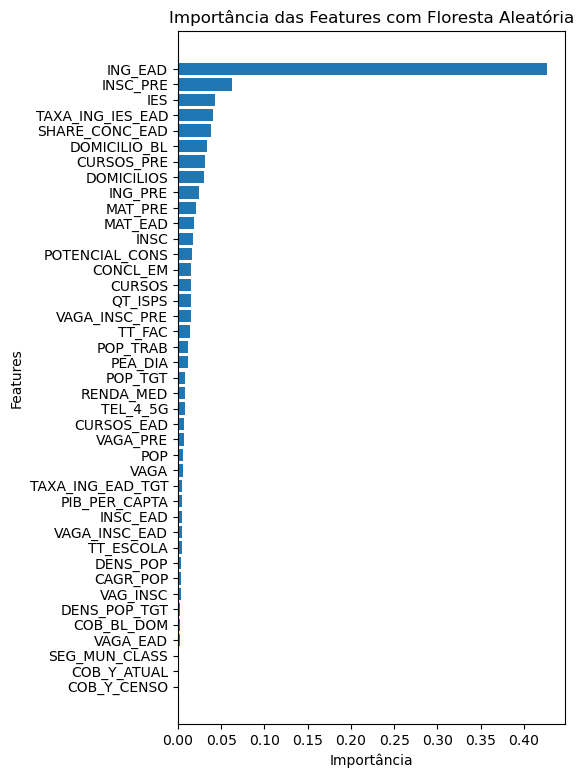

            Features  Importance
1            ING_EAD    0.426693
7           INSC_PRE    0.062818
20               IES    0.043444
21  TAXA_ING_IES_EAD    0.040847
22    SHARE_CONC_EAD    0.038727
28      DOMICILIO_BL    0.034145
16        CURSOS_PRE    0.031907
36        DOMICILIOS    0.029932
2            ING_PRE    0.024632
4            MAT_PRE    0.021441
3            MAT_EAD    0.018625
5               INSC    0.017990
40    POTENCIAL_CONS    0.016678
17          CONCL_EM    0.015709
14            CURSOS    0.015370
26           QT_ISPS    0.015127
13     VAGA_INSC_PRE    0.014634
19            TT_FAC    0.013857
33          POP_TRAB    0.011630
32           PEA_DIA    0.011522
38           POP_TGT    0.008757
31         RENDA_MED    0.008589
25          TEL_4_5G    0.008509
15        CURSOS_EAD    0.007534
10          VAGA_PRE    0.007273
35               POP    0.005529
8               VAGA    0.005394
0   TAXA_ING_EAD_TGT    0.005271
30     PIB_PER_CAPTA    0.004996
6         

In [7]:
#verificando relevancia das features
from sklearn.ensemble import RandomForestRegressor
df_importancia = df_modelo
# Dividindo o DataFrame em features (X) e target (y)
# Assumindo que 'TAXA_ING_EAD_KROTON_TGT' é o target
X = df_importancia.drop('ING_EAD_Y', axis=1)
y = df_importancia['ING_EAD_Y']

# Treinando o modelo de Floresta Aleatória
modelo = RandomForestRegressor(n_estimators=100)
modelo.fit(X, y)

# Obtendo a importância das features
importancias = modelo.feature_importances_

# Criando um DataFrame para facilitar a visualização
features_df = pd.DataFrame({'Features': X.columns, 'Importance': importancias})

# Ordenando as features por importância
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotando as importâncias
plt.figure(figsize=(5, 9))
plt.barh(features_df['Features'], features_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features com Floresta Aleatória')
plt.gca().invert_yaxis()  # Inverte o eixo y para a feature mais importante aparecer no topo
plt.show()
print(features_df)

### Correlação das váriaveis com o nosso Target Ingressanets empresa Y

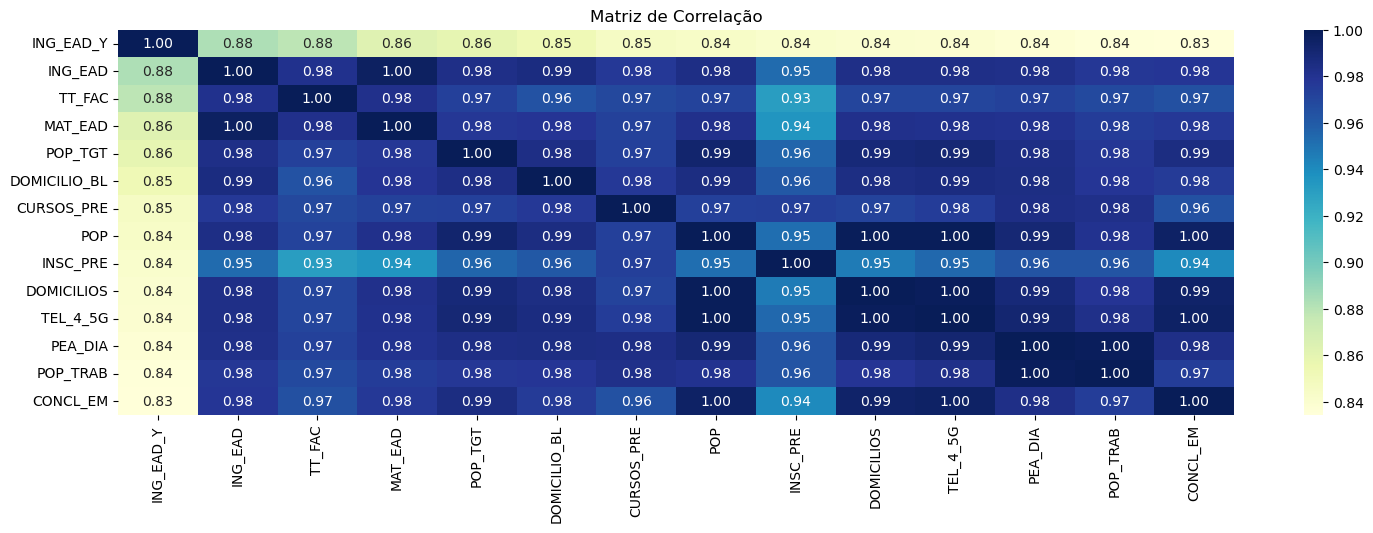

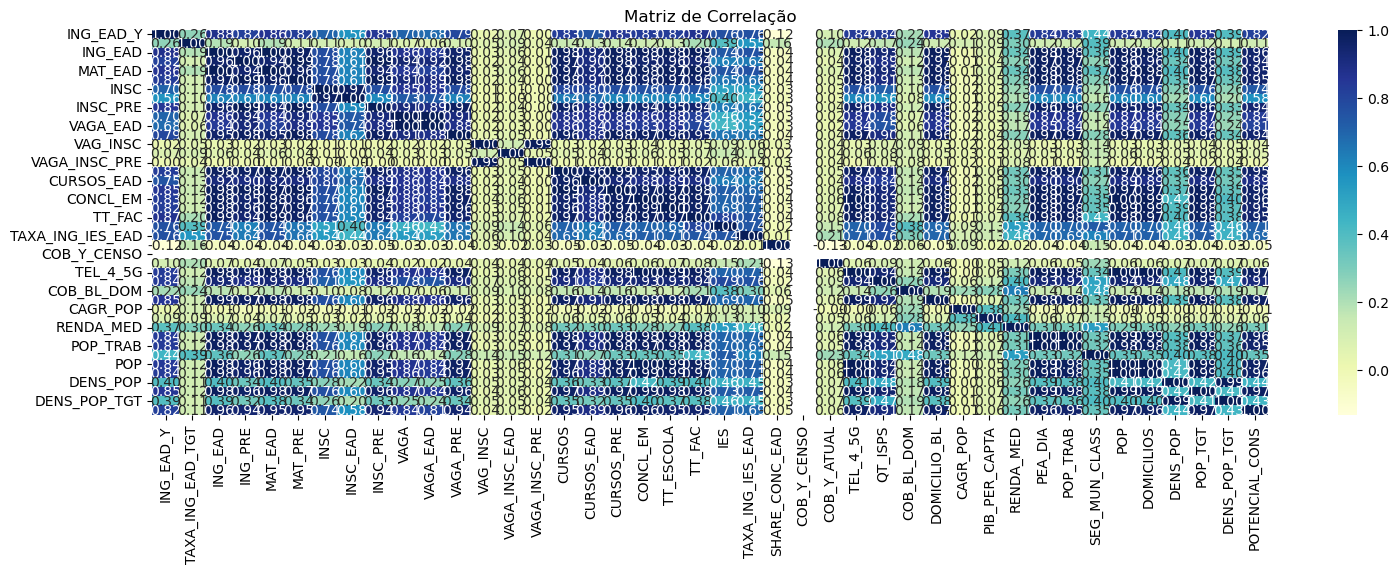

            Variable  Correlation with ING_EAD_Y
0          ING_EAD_Y                    1.000000
1            ING_EAD                    0.883052
2             TT_FAC                    0.878611
3            MAT_EAD                    0.863369
4            POP_TGT                    0.859465
5       DOMICILIO_BL                    0.852618
6         CURSOS_PRE                    0.845543
7                POP                    0.843634
8           INSC_PRE                    0.840994
9         DOMICILIOS                    0.839904
10          TEL_4_5G                    0.839020
11           PEA_DIA                    0.837123
12          POP_TRAB                    0.835170
13          CONCL_EM                    0.834352
14            CURSOS                    0.828247
15         TT_ESCOLA                    0.827870
16           QT_ISPS                    0.825362
17    POTENCIAL_CONS                    0.822050
18           MAT_PRE                    0.819377
19           ING_PRE

In [8]:
#PRINCIPAIS FEATURES
selected_variables = [
    'ING_EAD_Y', 'ING_EAD', 'TT_FAC', 'MAT_EAD', 'POP_TGT', 'DOMICILIO_BL',
    'CURSOS_PRE', 'POP', 'INSC_PRE', 'DOMICILIOS', 'TEL_4_5G', 'PEA_DIA',
    'POP_TRAB', 'CONCL_EM'
]

# Filtrar o dataframe para manter apenas as variáveis selecionadas
df_selected = df[selected_variables]
# Calcular a matriz de correlação para as variáveis selecionadas
matriz_correlacao = df_selected.corr()
# Plotar a matriz de correlação
plt.figure(figsize=(18, 5))  # Ajuste o tamanho conforme necessário
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Matriz de Correlação')
plt.show()

#verificando correlação das features
matriz_correlacao = df_modelo.corr()
plt.figure(figsize=(18, 5))  # tamanho
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Matriz de Correlação')
plt.show()
matriz_correlacao = df.corr()
# Ordem de correlação com 'ING_EAD_KROTON'
correlation_with_target = matriz_correlacao['ING_EAD_Y'].sort_values(ascending=False)
# Tbela ordenada
correlation_table = pd.DataFrame({'Variable': correlation_with_target.index,
                                  'Correlation with ING_EAD_Y': correlation_with_target.values})
# Plotar
print(correlation_table)



### Retirado as Features menos relevantes

In [9]:
# Excluir do modelo as Feeatures menos relevantes
colunas_para_excluir = ['DENS_POP_TGT','TAXA_ING_EAD_TGT','RENDA_MED','COB_Y_CENSO','COB_Y_ATUAL',
'COB_BL_DOM','VAGA_INSC_EAD','PIB_PER_CAPTA','VAG_INSC','CAGR_POP','COB_Y_ATUAL']                       
# Excluindo as colunas do DataFrame
df_modelo = df_modelo.drop(colunas_para_excluir, axis=1)
print(df_modelo.shape)


(1576, 32)


### Normalização dos dados  e Divisão das bases de Teste e Treino

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df_modelo.drop('ING_EAD_Y', axis=1)
y = df_modelo['ING_EAD_Y']

np.random.seed(42)

#Normalização dos dados (features)
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

#Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



## Modelagem e Algoritimos

#1. Regressão Linear Simples  -   y=β0​+β1​x+ϵ

#2. RandomForest - Floresta Aleatória(Entropia ou Gini, Varias árvores de decição)

#3. XGBoost 

#4. Gradient Boosting

#5. SVR - Suport Vector Machine

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR

# Treinamento do modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Treinamento do modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# xgboost Boosting
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=150, random_state=42)
xg_model.fit(X_train, y_train)
y_pred_xg = xg_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Support Vector Machines (SVM)
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


### Avaliação do Modelo

 avaliar o desempenho de ambos usando o coeficiente de determinação (R²)  e a raiz do erro médio quadrático (RMSE).
 
 O R² varia de 0 a 1 e indica a proporção da variância dos dados que é explicada pelo modelo. O RMSE é uma medida da diferença entre os valores previstos pelo modelo e os valores observados.
 

Regressão Linear - R²: 0.82, RMSE: 352.83
Random Forest - R²: 0.88, RMSE: 290.89
Xgboos - R²: 0.87, RMSE: 301.66
Gradient Boosting - R²: 0.90, RMSE: 258.05
SVM - R²: -0.07, RMSE: 855.44


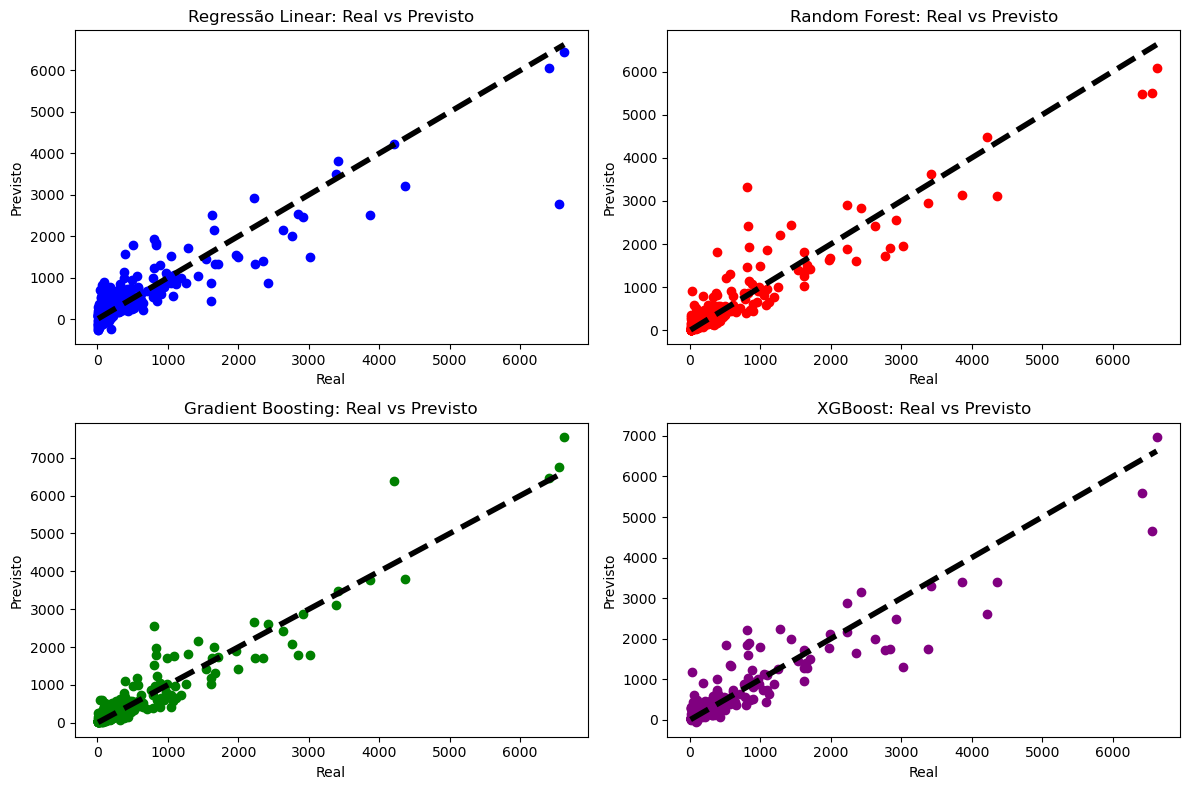

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Avaliação para o modelo de Regressão Linear
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"Regressão Linear - R²: {r2_linear:.2f}, RMSE: {rmse_linear:.2f}")

# Avaliação para o modelo de Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest - R²: {r2_rf:.2f}, RMSE: {rmse_rf:.2f}")

# Avaliação do xgBoost
r2_xg = r2_score(y_test, y_pred_xg)
rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_xg))
print(f"Xgboos - R²: {r2_xg:.2f}, RMSE: {rmse_xg:.2f}")

# Avaliação do Gradient Boosting
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"Gradient Boosting - R²: {r2_gb:.2f}, RMSE: {rmse_gb:.2f}")

# Avaliação do SVM
r2_svm = r2_score(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
print(f"SVM - R²: {r2_svm:.2f}, RMSE: {rmse_svm:.2f}")

# Visualização dos resultados
plt.figure(figsize=(12, 8))

# Gráfico para Regressão Linear
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Regressão Linear: Real vs Previsto')

# Gráfico para Random Forest
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_rf, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Random Forest: Real vs Previsto')

# Gráfico para Gradient Boosting
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_gb, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Gradient Boosting: Real vs Previsto')

# Gráfico para XGboost
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_xg, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('XGBoost: Real vs Previsto')

plt.tight_layout()
plt.show()


### Comparando os resultados dos modelos:

Os modelos Gradient Boosting, Random Forest e XGBoost apresentaram um desempenho semelhantes considerando as métricas fornecidas. Aqui estão alguns pontos a considerar:

O coeficiente R² é maior para o Gradient Boosting (0.90), mas ainda próximo do Random Forest (0.88) e XGBoost(0.87) em comparação com a Regressão Linear (0.64), indicando que esses modelos explicam uma proporção maior da variância dos dados.

O RMSE é menor para o Gradient Boosting (258). 

Vamos descartar os modelos Regrassão Simples e SVM e tunar os outros 3 algoritimos para ver se melhoramos a performance.

### Tunando o modelo

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
param_grid_xgb = {
    'n_estimators': [120, 200, 260],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [ 2, 3, 4],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.9, 1.0]
}
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)
rmse_best_xgb = root_mean_squared_error(y_test, y_pred_best_xgb)
print(f"Optimized XGBoost - R²: {r2_best_xgb:.2f}, RMSE: {rmse_best_xgb:.2f}")

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
param_grid_gb = {
    'n_estimators': [250, 300, 350],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [6, 8, 11],
    'min_samples_leaf': [1, 2, 3]
}
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)
r2_best_gb = r2_score(y_test, y_pred_best_gb)
rmse_best_gb = root_mean_squared_error(y_test, y_pred_best_gb)
print(f"Optimized Gradient Boosting - R²: {r2_best_gb:.2f}, RMSE: {rmse_best_gb:.2f}")

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
param_distributions_rf = {
    'n_estimators': [120, 150, 200],
    'max_depth': [15, 18, 20, 22],
    'min_samples_split': [14, 16, 18],
    'min_samples_leaf': [1, 2, 4]
}
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions_rf, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')
random_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", random_search_rf.best_params_)
best_rf_model = random_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
rmse_best_rf = root_mean_squared_error(y_test, y_pred_best_rf)
print(f"Optimized Random Forest - R²: {r2_best_rf:.2f}, RMSE: {rmse_best_rf:.2f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 120, 'subsample': 1.0}
Optimized XGBoost - R²: 0.88, RMSE: 284.08
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 350}
Optimized Gradient Boosting - R²: 0.88, RMSE: 286.54
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for Random Forest: {'n_estimators': 120, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_depth': 22}
Optimized Random Forest - R²: 0.88, RMSE: 290.74


### Curva de aprendizado Teste e validação

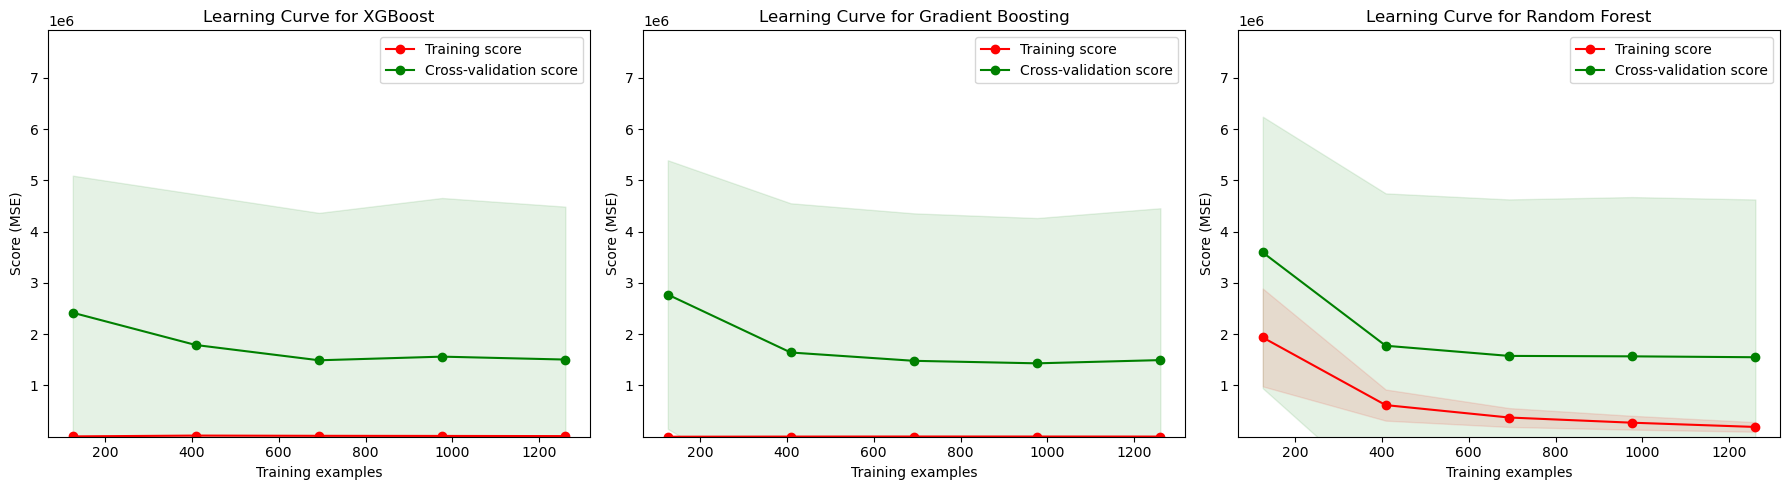

In [26]:
from sklearn.model_selection import learning_curve

# calcular os scores de treinamento e teste para todos os modelos
def get_train_test_scores(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error'
    )
    return train_scores, test_scores

# scores para todos os modelos
train_scores_xgb, test_scores_xgb = get_train_test_scores(best_xgb_model, X, y)
train_scores_gb, test_scores_gb = get_train_test_scores(best_gb_model, X, y)
train_scores_rf, test_scores_rf = get_train_test_scores(best_rf_model, X, y)

# máximo e mínimo entre todos os scores para definir um limite comum
max_limit = max(np.max(-train_scores_xgb), np.max(-test_scores_xgb),
                np.max(-train_scores_gb), np.max(-test_scores_gb),
                np.max(-train_scores_rf), np.max(-test_scores_rf))

min_limit = min(np.min(-train_scores_xgb), np.min(-test_scores_xgb),
                np.min(-train_scores_gb), np.min(-test_scores_gb),
                np.min(-train_scores_rf), np.min(-test_scores_rf))

# definir um limite comum para todos os gráficos
common_ylim = (min_limit, max_limit)

def plot_learning_curve(estimator, X, y, ax, title="Learning Curve", ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    if ylim is not None:
        ax.set_ylim(*ylim)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.set_title(title)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score (MSE)")
    ax.legend(loc="best")

# Defir figura e eixos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Width, Height

# Definindo os limites comuns para os eixos y
common_ylim = (min_limit, max_limit)

# XGBoost
plot_learning_curve(best_xgb_model, X, y, axes[0], title="Learning Curve for XGBoost", ylim=common_ylim)

# Gradient Boosting
plot_learning_curve(best_gb_model, X, y, axes[1], title="Learning Curve for Gradient Boosting", ylim=common_ylim)

# Random Forest
plot_learning_curve(best_rf_model, X, y, axes[2], title="Learning Curve for Random Forest", ylim=common_ylim)

plt.tight_layout()  # Adjust the layout
plt.show()



In [27]:
# o menor erro de validação cruzada no final da curva
#xgboost
train_sizes, train_scores, test_scores = learning_curve(
    best_xgb_model, X, y, cv=5, scoring='neg_mean_squared_error'
)

# O menor erro de validação cruzada (maior valor negativo) no final da curva
min_validation_error_xgb = np.max(test_scores.mean(axis=1))

#Gradientboost
train_sizes, train_scores, test_scores = learning_curve(
    best_gb_model, X, y, cv=5, scoring='neg_mean_squared_error'
)

# O menor erro de validação cruzada (maior valor negativo) no final da curva
min_validation_error_gb_model = np.max(test_scores.mean(axis=1))

#Random forest
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error'
)

# O menor erro de validação cruzada (maior valor negativo) no final da curva
min_validation_error_rf_model = np.max(test_scores.mean(axis=1))

print(f"min_validation_error_gb_model: {min_validation_error_gb_model}")
print(f"min_validation_error_xgb: {min_validation_error_xgb}")
print(f"min_validation_error_rf_model: {min_validation_error_rf_model}")

min_validation_error_gb_model: -1431214.8407831143
min_validation_error_xgb: -1490627.04087898
min_validation_error_rf_model: -1550028.43739631


### Projetar a previsão na base original

In [28]:
df_novas_cidades = df
# Preparando os dados para previsão
features_modelo = X.columns  # As features usadas para treinar o modelo
df_previsao = df[features_modelo]

# Aplicando o modelo XGBoost nas novas cidades
y_pred_xgboost = best_xgb_model.predict(df_previsao)

# Aplicando o modelo Gradient Boosting nas novas cidades
y_pred_gradient = best_gb_model.predict(df_previsao)

# Aplicando o modelo Random Forest nas novas cidades
y_pred_random_forest = best_rf_model.predict(df_previsao)

# Adicionando as previsões ao DataFrame
df_novas_cidades['Previsao_ING_EAD_Y_XGBoost'] = y_pred_xgboost
df_novas_cidades['Previsao_ING_EAD_Y_Gradient'] = y_pred_gradient
df_novas_cidades['Previsao_ING_EAD_Y_RandomForest'] = y_pred_random_forest
df_novas_cidades['COD_IBGE'] = data['COD_IBGE']

# Reordenar as colunas para colocar 'COD_IBGE' na primeira posição
colunas = ['COD_IBGE'] + [col for col in df if col != 'COD_IBGE']
df_novas_cidades = df_novas_cidades[colunas]

# Visualizando os resultados
print(df_novas_cidades[['Previsao_ING_EAD_Y_XGBoost', 'Previsao_ING_EAD_Y_Gradient', 'Previsao_ING_EAD_Y_RandomForest']])
df_novas_cidades

      Previsao_ING_EAD_Y_XGBoost  Previsao_ING_EAD_Y_Gradient  \
0                   32138.572266                 32663.510136   
1                   11497.603516                 11256.420993   
2                   13394.542969                 13365.048389   
3                   16302.708008                 16237.928699   
4                    3286.898926                  3313.581043   
...                          ...                          ...   
5565                   19.211283                    10.142277   
5566                   19.211283                    10.142277   
5567                   19.211283                    10.142277   
5568                   19.211283                    10.142277   
5569                   19.211283                    10.142277   

      Previsao_ING_EAD_Y_RandomForest  
0                        18298.043704  
1                        11574.968405  
2                        11755.634166  
3                        11423.891673  
4                  

,COD_IBGE,ING_EAD_Y,TAXA_ING_EAD_TGT,ING_EAD,ING_PRE,MAT_EAD,MAT_PRE,INSC,INSC_EAD,INSC_PRE,...,POP,DOMICILIOS,DENS_POP,POP_TGT,DENS_POP_TGT,POTENCIAL_CONS,IDH_EDU_CLASS,Previsao_ING_EAD_Y_XGBoost,Previsao_ING_EAD_Y_Gradient,Previsao_ING_EAD_Y_RandomForest
0,355030,32681,0.142145,222593,189594,284329,439474,1840442,1108951,731491,...,12200180,4442084,8009,1565954,1028,1094940046,4,32138.572266,32663.510136,18298.043704
1,330455,11232,0.158459,111087,48918,165801,153470,888574,718931,169643,...,6625849,2584457,5520,701048,584,508213357,4,11497.603516,11256.420993,11574.968405
2,530010,13377,0.181239,69560,35511,91739,91683,277637,80428,197209,...,2923369,1045027,505,383802,66,224829161,4,13394.542969,13365.048389,11755.634166
3,310620,16279,0.162581,51826,34943,72852,98148,278832,117947,160885,...,2392678,939891,7220,318769,962,206148436,4,16302.708008,16237.928699,11423.891673
4,410690,3300,0.185499,49522,25216,72261,68699,397532,319190,78342,...,1871789,684786,4300,266967,613,312596797,4,3286.898926,3313.581043,6690.824836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,311560,0,0.000000,0,0,0,0,0,0,0,...,1072,468,4,123,0,48532,3,19.211283,10.142277,11.025243
5566,353286,0,0.000000,0,0,0,0,0,0,0,...,1059,423,6,129,1,69664,4,19.211283,10.142277,11.025243
5567,510120,0,0.000000,0,0,0,0,0,0,0,...,998,387,1,123,0,52447,3,19.211283,10.142277,11.025243
5568,520120,0,0.000000,0,0,0,0,0,0,0,...,927,382,16,125,2,175862,3,19.211283,10.142277,11.025243


### Analisar erros

Erro absoluto (MAE)*: significa que em média a previsão e o valor real desvia 37 Ingressantes

RMSE = √(Σ(yi - ŷi)² / n): Dá mais peso aos erros maiores, pois os erros são elevados ao quadrado antes de serem médios, e então a raiz quadrada é tirada, significa que o desvio padrão das previsões do modelo em relação aos valores observados é de aproximadamente 176 Ingressantes.

Erro Médio Absoluto (MAE):
XGBoost: 40.71038869001921
Gradient Boosting: 28.578969932587995
Random Forest: 49.60154284969409

Erro Quadrático Médio (MSE):
XGBoost: 9286.172967532426
Gradient Boosting: 7215.805321317515
Random Forest: 75796.08381881168

Raiz do Erro Quadrático Médio (RMSE):
XGBoost: 96.364791119643
Gradient Boosting: 84.94589643601105
Random Forest: 275.31088576155446


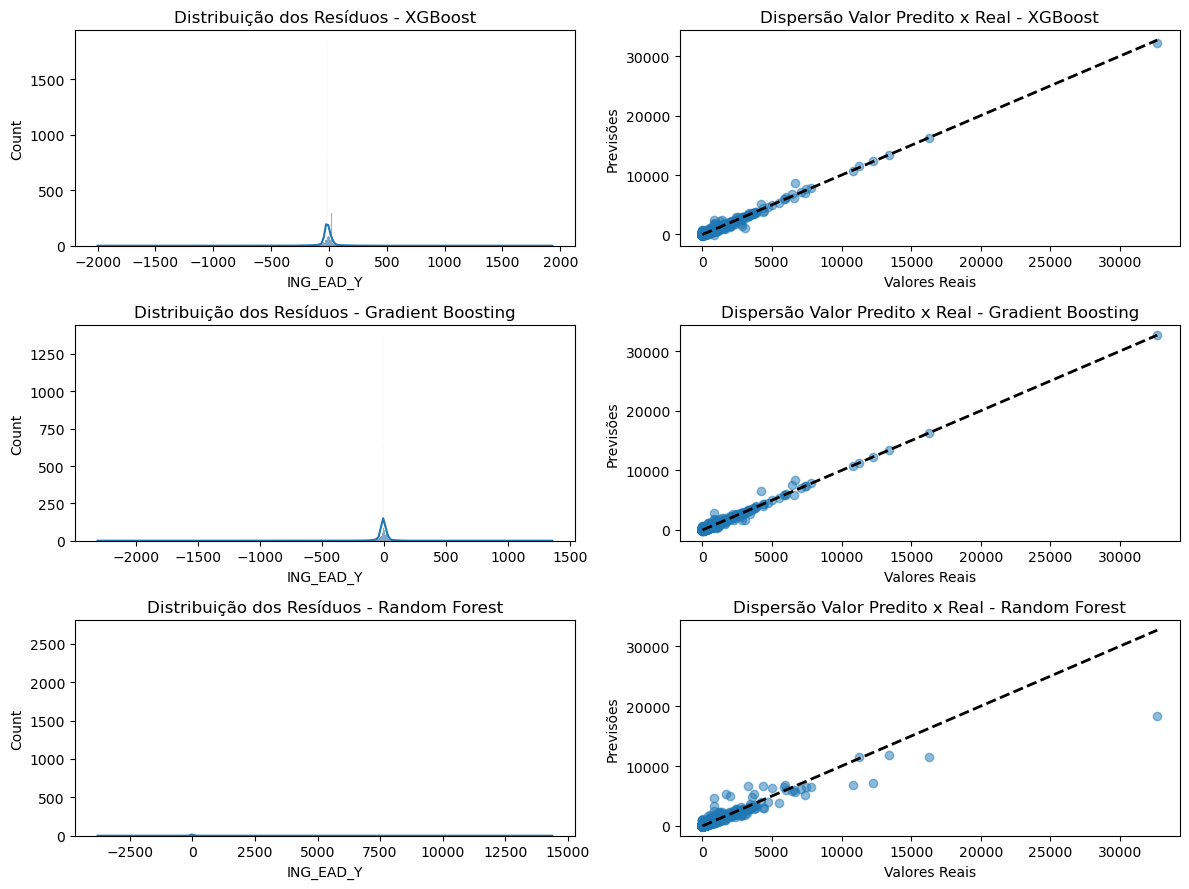

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# 'y_real' é a série do pandas com os valores reais
y_real = df_novas_cidades['ING_EAD_Y']  # valores reais

# Calculando os erros para o modelo XGBoost
mae_xgboost = mean_absolute_error(y_real, y_pred_xgboost)
mse_xgboost = mean_squared_error(y_real, y_pred_xgboost)
rmse_xgboost = sqrt(mse_xgboost)

# Calculando os erros para o modelo Gradient Boosting
mae_gradient = mean_absolute_error(y_real, y_pred_gradient)
mse_gradient = mean_squared_error(y_real, y_pred_gradient)
rmse_gradient = sqrt(mse_gradient)

# Calculando os erros para o modelo Random Forest
mae_random_forest = mean_absolute_error(y_real, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_real, y_pred_random_forest)
rmse_random_forest = sqrt(mse_random_forest)

# Imprimindo os erros
print("Erro Médio Absoluto (MAE):")
print(f"XGBoost: {mae_xgboost}")
print(f"Gradient Boosting: {mae_gradient}")
print(f"Random Forest: {mae_random_forest}")

print("\nErro Quadrático Médio (MSE):")
print(f"XGBoost: {mse_xgboost}")
print(f"Gradient Boosting: {mse_gradient}")
print(f"Random Forest: {mse_random_forest}")

print("\nRaiz do Erro Quadrático Médio (RMSE):")
print(f"XGBoost: {rmse_xgboost}")
print(f"Gradient Boosting: {rmse_gradient}")
print(f"Random Forest: {rmse_random_forest}")

# Calculando os resíduos para cada modelo
residuos_xgboost = y_real - y_pred_xgboost
residuos_gradient = y_real - y_pred_gradient
residuos_random_forest = y_real - y_pred_random_forest

# Criando uma figura com 3 linhas e 2 colunas
fig, axs = plt.subplots(3, 2, figsize=(12, 9))

# Gráficos para o modelo XGBoost
sns.histplot(residuos_xgboost, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribuição dos Resíduos - XGBoost')
axs[0, 1].scatter(y_real, y_pred_xgboost, alpha=0.5)
axs[0, 1].set_title('Dispersão Valor Predito x Real - XGBoost')
axs[0, 1].set_xlabel('Valores Reais')
axs[0, 1].set_ylabel('Previsões')
axs[0, 1].plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=2)

# Gráficos para o modelo Gradient Boosting
sns.histplot(residuos_gradient, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribuição dos Resíduos - Gradient Boosting')
axs[1, 1].scatter(y_real, y_pred_gradient, alpha=0.5)
axs[1, 1].set_title('Dispersão Valor Predito x Real - Gradient Boosting')
axs[1, 1].set_xlabel('Valores Reais')
axs[1, 1].set_ylabel('Previsões')
axs[1, 1].plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=2)

# Gráficos para o modelo Random Forest
sns.histplot(residuos_random_forest, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Distribuição dos Resíduos - Random Forest')
axs[2, 1].scatter(y_real, y_pred_random_forest, alpha=0.5)
axs[2, 1].set_title('Dispersão Valor Predito x Real - Random Forest')
axs[2, 1].set_xlabel('Valores Reais')
axs[2, 1].set_ylabel('Previsões')
axs[2, 1].plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=2)

# Ajustando o layout
plt.tight_layout()
plt.show()

In [139]:
nome_arquivo = "Modelo_Preditivo_Ingressantes.xlsx"
df_novas_cidades.to_excel(nome_arquivo, index=False)
print(f"DataFrame foi exportado com sucesso para {nome_arquivo}")

DataFrame foi exportado com sucesso para Modelo_Preditivo_Ingressantes.xlsx
